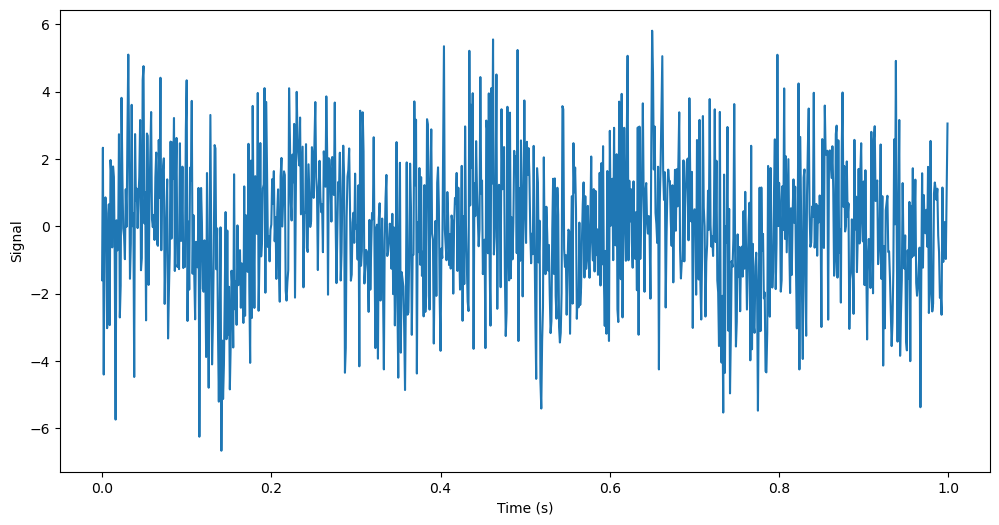

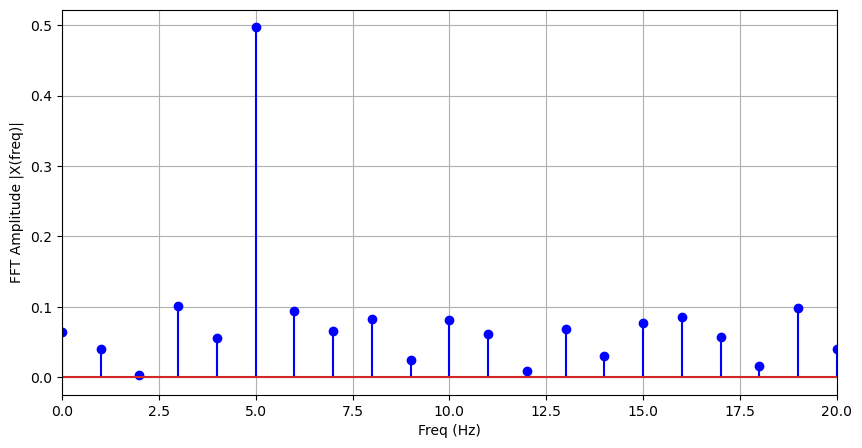

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading noisy data from file
time, amplitude = np.genfromtxt('noisy_signal.txt', delimiter=' ').transpose()

# time spacing
dt = abs(time[1]-time[0])

plt.figure(figsize = (12, 6))
plt.plot(time, amplitude)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()

# Fast Fourier transform the data
X = np.fft.fft(amplitude)

# Number of points in the demand plot
N = len(X)

# FFT will calculate the transform for all N points, but we just need to look at half of it
# For N FFT points, the other half is mirrored
n_oneside = N//2

# To create the frequency axis, we need the sampling rate in reciprocal space
sampling_rate = 1.0/dt 
# Calculate the frequency bins in Hz, given the sampling interval d=1/sampling_rate
frequency_axis = np.fft.fftfreq(N, d=1/sampling_rate)
norm_fft_amplitude = np.abs(X)/N

plt.figure(figsize = (10, 5))
plt.stem(frequency_axis[:n_oneside], np.abs(norm_fft_amplitude[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim([0,20])
plt.grid()
plt.show()

<b>Sampling Rate</b>

The <u>Nyquist theorem</u> states that the sampling rate should be at least twice the highest frequency present in your signal, i.e.,

\begin{equation}
F_s \ge 2\times f_{max}
\end{equation}

with $F_s$ being the sampling frequency and $f_{max}$ is the highest frequency of interest in the signal. For example, if the signal contains frequencies up to 500 Hz, then we should sample at a minimum rate of 1000 Hz.

If a timeline is to be set in accordance with a sampling rate (in frequency), we write:

`Fs = 1200  # Example sampling rate, 1200 Hz`

`t = np.arange(0, 1, 1/Fs)  # Creates time vector from 0 to 1 second at 1200 Hz`

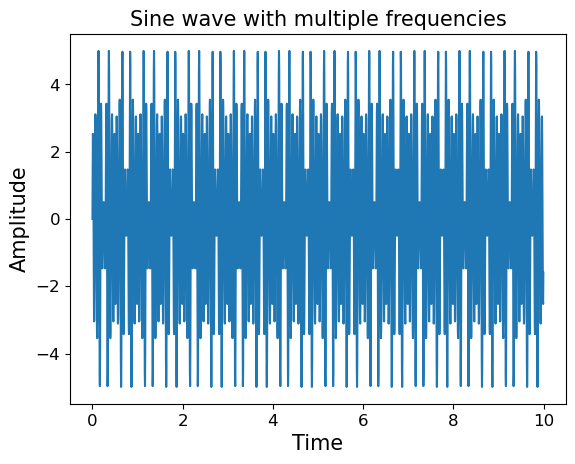

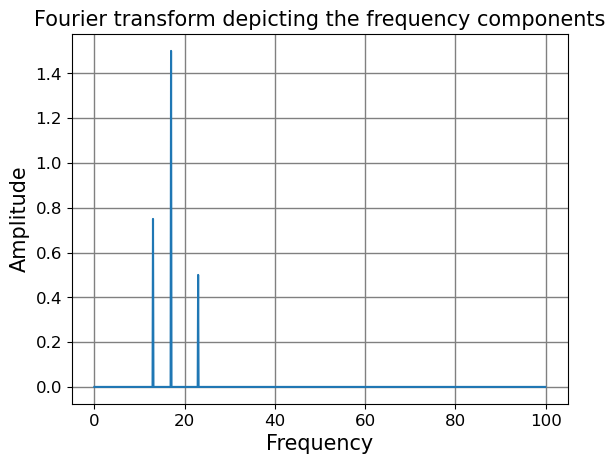

In [9]:
# manually set the sampling frequency
samplingFrequency   = 200 # Example: 100 Hz sampling rate
# set the samplingFrequency to 10 so you can see an inaccurate sampling rate.
samplingInterval = 1 / samplingFrequency

# building the signal in time
beginTime = 0
endTime = 10
time = np.arange(beginTime, endTime, samplingInterval);

# signal is a superposition of 3 sinusoidal functions
amplitude1 = np.sin(2*np.pi*23*time)
amplitude2 = 3*np.sin(2*np.pi*17*time)
amplitude3 = -1.5*np.sin(2*np.pi*13*time)

amplitude = amplitude1 + amplitude2 + amplitude3

# Plotting the signal
plt.title('Sine wave with multiple frequencies',fontsize=15)
plt.plot(time, amplitude)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Fourier Transform
fourierTransform = np.fft.fft(amplitude)/len(amplitude)
fourierTransform = fourierTransform[range(int(len(amplitude)/2))]

# Relevant parameters of the Fourier Transform
tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

plt.title('Fourier transform depicting the frequency components',fontsize=15)
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.plot(frequencies, abs(fourierTransform))
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()